<a href="https://colab.research.google.com/github/lucguittard/DS-Unit-2-Regression-Classification/blob/master/Luc_Guittard_assignment_regression_classification_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 3

## Assignment

We're going back to our other **New York City** real estate dataset. Instead of predicting apartment rents, you'll predict property sales prices.

But not just for condos in Tribeca...

Instead, predict property sales prices for **One Family Dwellings** (`BUILDING_CLASS_CATEGORY` == `'01 ONE FAMILY DWELLINGS'`) using a subset of the data where the **sale price was more than \\$100 thousand and less than $2 million.** 

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.


- [X] Do train/test split. Use data from January — March 2019 to train. Use data from April 2019 to test.
- [X] Do exploratory visualizations with Seaborn.
- [X] Do one-hot encoding of categorical features.
- [X] Do feature selection with `SelectKBest`.
- [X] Fit a linear regression model with multiple features.
- [X] Get mean absolute error for the test set.
- [X] As always, commit your notebook to your fork of the GitHub repo.


## Stretch Goals
- [ ] Add your own stretch goal(s) !
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Learn more about feature selection:
    - ["Permutation importance"](https://www.kaggle.com/dansbecker/permutation-importance)
    - [scikit-learn's User Guide for Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)
    - [mlxtend](http://rasbt.github.io/mlxtend/) library
    - scikit-learn-contrib libraries: [boruta_py](https://github.com/scikit-learn-contrib/boruta_py) & [stability-selection](https://github.com/scikit-learn-contrib/stability-selection)
    - [_Feature Engineering and Selection_](http://www.feat.engineering/) by Kuhn & Johnson.
- [ ] Try [statsmodels](https://www.statsmodels.org/stable/index.html) if you’re interested in more inferential statistical approach to linear regression and feature selection, looking at p values and 95% confidence intervals for the coefficients.
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).
(That book is good regardless of whether your cultural worldview is inferential statistics or predictive machine learning)
- [ ] Read Leo Breiman's paper, ["Statistical Modeling: The Two Cultures"](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html):

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

## Startup

In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module3')

     |████████████████████████████████| 92kB 3.4MB/s 
     |████████████████████████████████| 133kB 8.5MB/s 
     |████████████████████████████████| 7.1MB 49.1MB/s 
     |████████████████████████████████| 614kB 41.6MB/s 
     |████████████████████████████████| 225kB 51.3MB/s 
     |████████████████████████████████| 768kB 49.1MB/s 
     |████████████████████████████████| 51kB 24.1MB/s 
     |████████████████████████████████| 194kB 55.3MB/s 
     |████████████████████████████████| 737kB 33.1MB/s 
     |████████████████████████████████| 51kB 23.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=de0fa8cf8908f483898a156f423a6a6a987b14d471964a8c9d1c4ff665c733a9
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=4ad44da1d0f81ba425345fa06adc23daa4353292e3f1dddf309901869dfc53e7
  Stored 

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd
import pandas_profiling

# Read New York City property sales data
df = pd.read_csv('../data/NYC_Citywide_Rolling_Calendar_Sales.csv')

# Change column names: replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

# SALE_PRICE was read as strings.
# Remove symbols, convert to integer
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)

In [0]:
#df.head(2)

## Do train/test split. Use data from January — March 2019 to train. Use data from April 2019 to test.

In [0]:
# make date_time type
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], infer_datetime_format=True)
df.head(2)
df['SALE_DATE'].dtype

In [0]:
train_mask = (df['SALE_DATE'] > '2018') & (df['SALE_DATE'] < '2019-04-01')
test_mask = (df['SALE_DATE'] > '2019-03-31') & (df['SALE_DATE'] < '2019-05-01')

train_df = df[train_mask]
test_df = df[test_mask]


## Exploratory Visuals w/ Seaborn

In [34]:
print(df.shape)
df.head(10)

(23040, 21)


,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,716,1246,NaN,R4,"447 WEST 18TH STREET, PH12A",PH12A,10011.0,1.0,0.0,1.0,"10,733",1979.0,2007.0,2,R4,0,2019-01-01
1,1,FASHION,21 OFFICE BUILDINGS,4,812,68,NaN,O5,144 WEST 37TH STREET,NaN,10018.0,0.0,6.0,6.0,"2,962",15435.0,1920.0,4,O5,0,2019-01-01
2,1,FASHION,21 OFFICE BUILDINGS,4,839,69,NaN,O5,40 WEST 38TH STREET,NaN,10018.0,0.0,7.0,7.0,"2,074",11332.0,1930.0,4,O5,0,2019-01-01
3,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,2,592,1041,NaN,R4,"1 SHERIDAN SQUARE, 8C",8C,10014.0,1.0,0.0,1.0,0,500.0,0.0,2,R4,0,2019-01-01
4,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1379,1402,NaN,R1,"20 EAST 65TH STREET, B",B,10065.0,1.0,0.0,1.0,0,6406.0,0.0,2,R1,0,2019-01-01
5,1,UPPER EAST SIDE (79-96),07 RENTALS - WALKUP APARTMENTS,2B,1551,131,NaN,C4,354 EAST 89TH STREET,NaN,10128.0,10.0,0.0,10.0,"2,013",6570.0,1920.0,2,C4,0,2019-01-01
6,1,UPPER WEST SIDE (96-116),07 RENTALS - WALKUP APARTMENTS,2B,1891,159,NaN,C4,304 WEST 106 STREET,NaN,10025.0,10.0,0.0,10.0,"1,716",5810.0,1900.0,2,C4,0,2019-01-01
7,2,MORRIS PARK/VAN NEST,01 ONE FAMILY DWELLINGS,1,4090,37,NaN,A1,1193 SACKET AVENUE,NaN,10461.0,1.0,0.0,1.0,"3,404",1328.0,1925.0,1,A1,0,2019-01-01
8,2,MORRIS PARK/VAN NEST,01 ONE FAMILY DWELLINGS,1,4120,18,NaN,A5,1215 VAN NEST AVENUE,NaN,10461.0,1.0,0.0,1.0,"2,042",1728.0,1935.0,1,A5,0,2019-01-01
9,2,MORRIS PARK/VAN NEST,01 ONE FAMILY DWELLINGS,1,4120,20,NaN,A5,1211 VAN NEST AVENUE,NaN,10461.0,1.0,0.0,1.0,"2,042",1728.0,1935.0,1,A5,0,2019-01-01


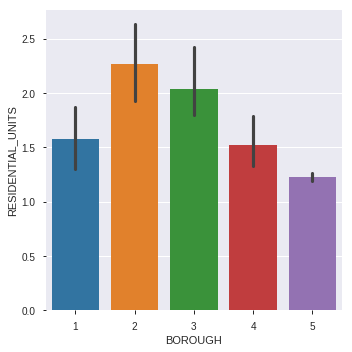

In [74]:
import seaborn as sns
train_df.nunique()
sns.catplot(x='BOROUGH', y='RESIDENTIAL_UNITS', kind = 'bar', data = train_df) #default: strip (scatter) plot

## One-Hot Encoding

In [79]:
train_df.head(2)
train_df.nunique()

BOROUGH                               5
NEIGHBORHOOD                        251
BUILDING_CLASS_CATEGORY              43
TAX_CLASS_AT_PRESENT                 10
BLOCK                              7226
LOT                                1326
EASE-MENT                             0
BUILDING_CLASS_AT_PRESENT           140
ADDRESS                           17926
APARTMENT_NUMBER                   1450
ZIP_CODE                            184
RESIDENTIAL_UNITS                    75
COMMERCIAL_UNITS                     34
TOTAL_UNITS                          83
LAND_SQUARE_FEET                   3207
GROSS_SQUARE_FEET                  3538
YEAR_BUILT                          139
TAX_CLASS_AT_TIME_OF_SALE             3
BUILDING_CLASS_AT_TIME_OF_SALE      140
SALE_PRICE                         3172
SALE_DATE                            90
dtype: int64

In [141]:
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

#defining components
target = 'BOROUGH'
high_cardinality = ['GROSS_SQUARE_FEET','LAND_SQUARE_FEET','SALE_PRICE','ZIP_CODE','APARTMENT_NUMBER','NEIGHBORHOOD', 'BLOCK','LOT',
                   'ADDRESS', 'BUILDING_CLASS_AT_TIME_OF_SALE','BUILDING_CLASS_AT_PRESENT', 'YEAR_BUILT', 'SALE_DATE','TOTAL_UNITS',
                   'RESIDENTIAL_UNITS','EASE-MENT','COMMERCIAL_UNITS']
features = train_df.columns.drop(['BOROUGH']+high_cardinality)

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

#encoding
encoder = ce.OneHotEncoder(use_cat_names = True)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

print(X_train_encoded.shape)
X_train_encoded.head(10)     #The ouput? An example of One-Hot-Encoding - breaking cardinal cats down to basic binary classes



(18167, 54)


,BUILDING_CLASS_CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,BUILDING_CLASS_CATEGORY_21 OFFICE BUILDINGS,BUILDING_CLASS_CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL,BUILDING_CLASS_CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING_CLASS_CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING_CLASS_CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING_CLASS_CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING_CLASS_CATEGORY_29 COMMERCIAL GARAGES,BUILDING_CLASS_CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING_CLASS_CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING_CLASS_CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING_CLASS_CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING_CLASS_CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING_CLASS_CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING_CLASS_CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING_CLASS_CATEGORY_22 STORE BUILDINGS,BUILDING_CLASS_CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING_CLASS_CATEGORY_44 CONDO PARKING,BUILDING_CLASS_CATEGORY_47 CONDO NON-BUSINESS STORAGE,BUILDING_CLASS_CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING_CLASS_CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING_CLASS_CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING_CLASS_CATEGORY_27 FACTORIES,BUILDING_CLASS_CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING_CLASS_CATEGORY_17 CONDO COOPS,BUILDING_CLASS_CATEGORY_26 OTHER HOTELS,BUILDING_CLASS_CATEGORY_45 CONDO HOTELS,BUILDING_CLASS_CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING_CLASS_CATEGORY_30 WAREHOUSES,BUILDING_CLASS_CATEGORY_46 CONDO STORE BUILDINGS,BUILDING_CLASS_CATEGORY_25 LUXURY HOTELS,BUILDING_CLASS_CATEGORY_34 THEATRES,BUILDING_CLASS_CATEGORY_37 RELIGIOUS FACILITIES,BUILDING_CLASS_CATEGORY_49 CONDO WAREHOUSES/FACTORY/INDUS,BUILDING_CLASS_CATEGORY_16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,BUILDING_CLASS_CATEGORY_11A CONDO-RENTALS,BUILDING_CLASS_CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES,BUILDING_CLASS_CATEGORY_23 LOFT BUILDINGS,BUILDING_CLASS_CATEGORY_28 COMMERCIAL CONDOS,BUILDING_CLASS_CATEGORY_48 CONDO TERRACES/GARDENS/CABANAS,BUILDING_CLASS_CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING_CLASS_CATEGORY_39 TRANSPORTATION FACILITIES,BUILDING_CLASS_CATEGORY_42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,TAX_CLASS_AT_PRESENT_2,TAX_CLASS_AT_PRESENT_4,TAX_CLASS_AT_PRESENT_2C,TAX_CLASS_AT_PRESENT_2B,TAX_CLASS_AT_PRESENT_1,TAX_CLASS_AT_PRESENT_1B,TAX_CLASS_AT_PRESENT_2A,TAX_CLASS_AT_PRESENT_1A,TAX_CLASS_AT_PRESENT_1C,TAX_CLASS_AT_PRESENT_1D,TAX_CLASS_AT_TIME_OF_SALE
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Feature selection with SelectKBest

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import SelectKBest, f_regression

In [144]:
#encoded
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

#SelectKBest
for k in range (1,len(X_train.columns) + 1):
  print(f'{k}features')
  selector = SelectKBest(score_func = f_regression,k = k)
  X_train_selected = selector.fit_transform(X_train_scaled,y_train)
  X_test_selected = selector.transform(X_test_scaled)
  model = LinearRegression()
  model.fit(X_train_selected, y_train)
  y_pred = model.predict(X_test_selected)
  
  mae = mean_absolute_error(y_test,y_pred)
  print(f'Test MAE: {mae:,.0f}\n')

1features
Test MAE: 1

2features
Test MAE: 1

3features
Test MAE: 1

